# Business Problem
Providing insightful analysis of property sales trends to a premium real estate client


### Data Import and Overview

In [39]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [40]:
#Reading the dataset
data = pd.read_csv("C:/Users/reddycad/OneDrive - Automatic Data Processing Inc/Documents/hackathon/property.csv")

In [41]:
#Getting No. of rows and columns in the dataset
data.shape

(4735, 21)

In [42]:
#Top 5 rows of the dataset
data.head()

,index,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,ApartmentUnitNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,...,LivingUnits,OwnerLastName,OwnerFirstName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID
0,0,30,3,4.00,144-698-048,22.00,NaN,BRISTOL ST,2,"6,000.00",...,1.00,KHAN,BIBI,ALI MUNTAAZ,12/10/2019,0,136600,07559-0116,5,8
1,1,50,3,4.00,121-698-073,164.00,NaN,HOLLYWOOD AVE,2,"5,650.00",...,1.00,GONZALEZ,LOURDES,GONZALEZ JOHNETTE,12/18/2019,179900,158400,07561-0225,1,10
2,2,58,3,6.00,121-699-090,87.00,NaN,BRISTOL ST,2,"5,850.00",...,1.00,SAMPAYO,YARLIS,FLOYD ANNIE J ESTATE,5/24/2019,174900,144400,07485-0035,12,1
3,3,66,3,6.00,144-699-037,55.00,NaN,BRISTOL ST,2,"5,900.00",...,1.00,CARRILLO PACHECO,RICARDO,HARGROVE DAVID L,9/10/2019,140000,142400,07523-0330,1,10
4,4,78,3,3.00,144-699-025,5.00,NaN,BRISTOL ST,2,"7,788.00",...,1.00,VARJABEDIAN ROSE M (L.U.),NaN,VARJABEDIAN ANTHONY ( L U),5/14/2020,0,147900,07616-0064,11,7


In [43]:

data.info() #basic info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    4735 non-null   int64  
 1   PropertyID               4735 non-null   int64  
 2   xrCompositeLandUseID     4735 non-null   int64  
 3   xrBuildingTypeID         4719 non-null   float64
 4   ParcelID                 4735 non-null   object 
 5   LocationStartNumber      4734 non-null   float64
 6   ApartmentUnitNumber      1474 non-null   object 
 7   StreetNameAndWay         4735 non-null   object 
 8   xrPrimaryNeighborhoodID  4735 non-null   int64  
 9   LandSF                   4165 non-null   float64
 10  TotalFinishedArea        4536 non-null   float64
 11  LivingUnits              4719 non-null   float64
 12  OwnerLastName            4734 non-null   object 
 13  OwnerFirstName           2375 non-null   object 
 14  PrimaryGrantor          

### Descriptive Statistics

In [44]:
pd.options.display.float_format = '{:,.2f}'.format
data.describe()  #statistical description of dataset


,index,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,LocationStartNumber,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,SalePrice,TotalAppraisedValue,xrSalesValidityID,xrDeedID
count,"4,735.00","4,735.00","4,735.00","4,719.00","4,734.00","4,735.00","4,165.00","4,536.00","4,719.00","4,735.00","4,735.00","4,735.00","4,735.00"
mean,"2,367.00","14,535.43",122.84,14.83,215.37,182.46,"9,110.30","4,855.43",2.33,"733,116.71","230,926.52",12.67,10.45
std,"1,367.02","8,746.00",184.83,13.77,371.41,152.96,"46,561.59","29,188.52",7.79,"2,202,404.61","1,528,451.72",10.28,4.19
min,0.00,11.00,3.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,183.50","6,913.00",4.00,6.00,38.00,46.00,0.00,900.00,1.00,0.00,"52,100.00",1.00,8.00
50%,"2,367.00","14,332.00",5.00,12.00,98.00,151.00,"6,140.00","1,776.00",1.00,"107,000.00","132,000.00",11.00,10.00
75%,"3,550.50","21,124.50",140.00,16.00,215.00,280.00,"7,880.00","3,508.25",2.50,"305,000.00","175,800.00",25.00,10.00
max,"4,734.00","28,862.00",458.00,105.00,"3,466.00",496.00,"1,576,872.00","983,691.59",266.00,"70,500,000.00","64,087,000.00",27.00,22.00


##### Statistical Summery Observations

- **LandSF**: The mean area of the land is 9,110.30 sft and max is 1,576,872.00 sft
- **SalePrice**: The mean SalePrice value is 733,116.71 and max is 70,500,000.00
- **LandSF**: The mean TotalAppraisedValue is 230,926.52 and max is 64,087,000.00
- **TotalFinishedArea**: The mean TotalFinishedArea is 4,855.43 and max is 983,691.59

We can conclude there is wide range of data for the key columns in our dataset.
Also, We can see there are many 0's in the minimum values which we can interpret as missing data 

### Missing Values Analysis

In [45]:
data.isnull().sum() #Getting null values for each column

index                         0
PropertyID                    0
xrCompositeLandUseID          0
xrBuildingTypeID             16
ParcelID                      0
LocationStartNumber           1
ApartmentUnitNumber        3261
StreetNameAndWay              0
xrPrimaryNeighborhoodID       0
LandSF                      570
TotalFinishedArea           199
LivingUnits                  16
OwnerLastName                 1
OwnerFirstName             2360
PrimaryGrantor                0
SaleDate                      0
SalePrice                     0
TotalAppraisedValue           0
LegalReference                7
xrSalesValidityID             0
xrDeedID                      0
dtype: int64

### Data Cleaning and Preprocessing

#### Dropping Irrevelant columns

- I am dropping the below mentioned columns as I feel they won't add much value to our analysis and they contain too many missing values


In [46]:
#Dropping clumns which are not important for analysis
data.drop(['index', 'PropertyID', 'ParcelID', 'OwnerLastName', 'OwnerFirstName', 'PrimaryGrantor', 'LegalReference', 'xrSalesValidityID', 'xrDeedID', 'ApartmentUnitNumber'], axis=1, inplace=True)

#### Finding Zeros

In [47]:
#Finding 0's in the dataset
zero_counts=(data==0).sum()
zero_counts

xrCompositeLandUseID          0
xrBuildingTypeID            187
LocationStartNumber           0
StreetNameAndWay              0
xrPrimaryNeighborhoodID       0
LandSF                     1209
TotalFinishedArea             1
LivingUnits                 447
SaleDate                      0
SalePrice                  1328
TotalAppraisedValue           9
dtype: int64

##### Observations
- There are many 0's in multiple columns which I am assuming them as missing data

#### Missing Value Imputation

In [48]:
#Imputing missing values for then following two cloumns with the column mode
data['xrBuildingTypeID'] = data['xrBuildingTypeID'].fillna(data['xrBuildingTypeID'].mode()[0])
data['LocationStartNumber'] = data['LocationStartNumber'].fillna(data['LocationStartNumber'].mode()[0])

In [49]:
rem_features_to_impute = ['LandSF', 'TotalFinishedArea', 'LivingUnits', 'SalePrice', 'TotalAppraisedValue']

for feature in rem_features_to_impute:
    data[feature]= data[feature].replace(0, np.nan) #Treating 0's as missing data and replacing with nan

    data[feature] = data[feature].fillna(data[feature].median())  #Imputing the missing values with median of that particular column 


In [50]:
data.isnull().sum() #checking null values

xrCompositeLandUseID       0
xrBuildingTypeID           0
LocationStartNumber        0
StreetNameAndWay           0
xrPrimaryNeighborhoodID    0
LandSF                     0
TotalFinishedArea          0
LivingUnits                0
SaleDate                   0
SalePrice                  0
TotalAppraisedValue        0
dtype: int64

##### Observations
 - We have used Mode-based imputation for xrBuildingTypeID, LocationStartNumber, here we replaced missing data with most frequent value
 - We used median based imputation for LandSF, TotalFinishedArea, LivingUnits features as these contain lots of data and which might contain outliers

#### Formatting date column
 - Converted SaleDate column to datetime format for future calculations

In [51]:
#Converting SaleDate to datetime format
data['SaleDate']= pd.to_datetime(data['SaleDate'])

### UniVariate Analysis

#### Seperating Important columns

In [52]:
important_features = ['LandSF', 'TotalFinishedArea', 'LivingUnits', 'SalePrice', 'TotalAppraisedValue'] #seperating important columns from the dataset

##### Observations
- I have seperated 5 columns from the dataset which I consider important for our analysis

#### Handling Outliers

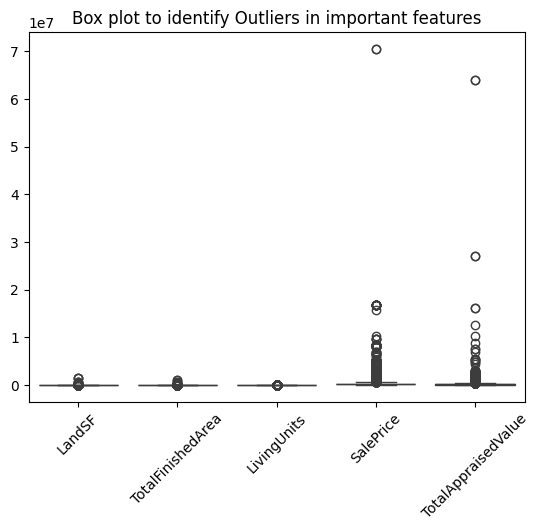

In [53]:
#Plotting box plot to visualize the outliers for important features
sns.boxplot(data=data[important_features])
plt.title('Box plot to identify Outliers in important features')
plt.xticks(rotation=45)
plt.show()

In [54]:
def handle_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3- Q1      #IQR is difference between first and third quantile

    lower_bound = Q1-1.5*IQR     #Generall, Upper and lower bounds are taken as +-1.5*IQR
    upper_bound = Q3+1.5*IQR

    #Capping outliers with upper and lower bounds using lambda function
    df[feature] = df[feature].apply(lambda x: lower_bound if x< lower_bound else (upper_bound if x>upper_bound else x))

    return df

In [55]:
for feature in important_features:
    data = handle_outliers(data, feature) #calling outlier handling function

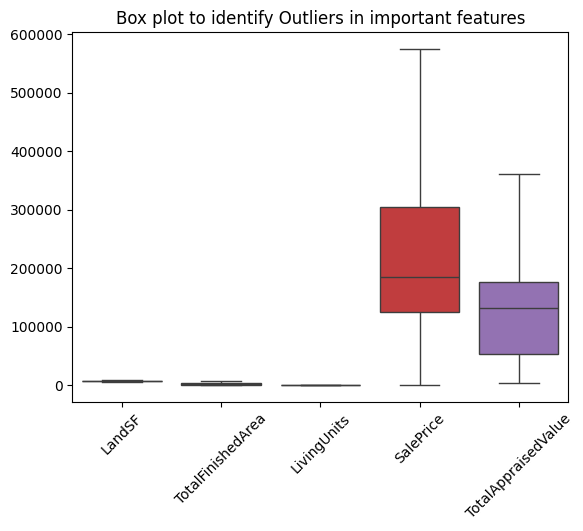

In [56]:
#Plotting box plot again to see if there are still any outliers present
sns.boxplot(data=data[important_features])
plt.title('Box plot to identify Outliers in important features')
plt.xticks(rotation=45)
plt.show()

##### Observations

Interquartile Range (IQR) is range between Q3 and Q1
- Outliers are datapoints with abnormal values
- We have used the box plots to visualize the outliers in key features (Box plots are designed on IQR)
- There are many data points outside the whiskers, which indicated presence of outliers
- We have used the IQR method to deal with outliers by capping the data to upper(Q3+1.5*IQR) and lower bounds(Q1-1.5*IQR)

#### Count Plot for Living Units

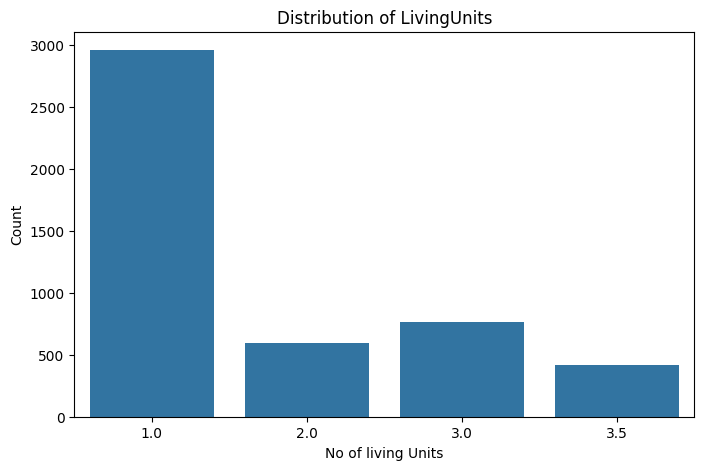

In [57]:
#Count plot for LivingUnits
plt.figure(figsize=(8,5))
sns.countplot(x='LivingUnits', data=data)
plt.title('Distribution of LivingUnits' )
plt.xlabel('No of living Units')
plt.ylabel('Count')

plt.show()

##### Obesrvations on the Living Units
- A significant portion of the properties has **1 living unit**, indicating single unit properties dominate the dataset
- Properties with **2 or 3 living units** makes up smaller share, indicating fewer multi-units
- Very few properties have **more than 3 living units**. I have capped them to 3.5 for consistency


### Bi Variate and Multi Variate Analysis

#### Correlation heatmap

<Axes: >

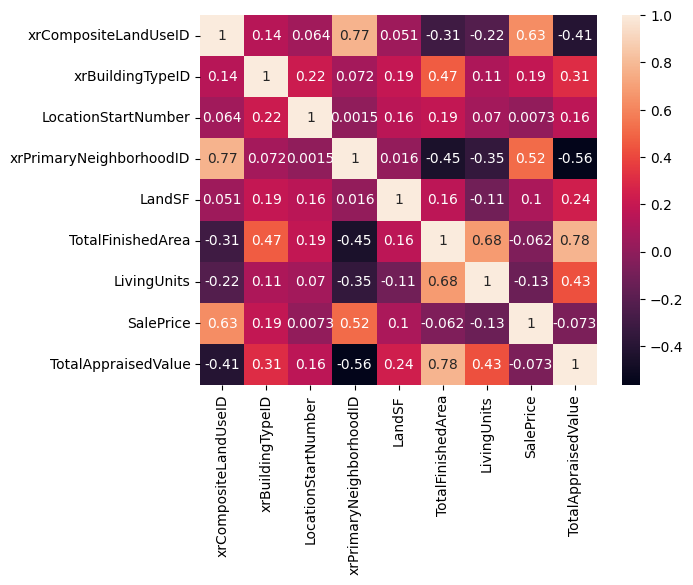

In [58]:
int_columns= data.select_dtypes(include=['float64', 'int64']).columns  #selecting numerical columns only
corr_matrix= data[int_columns].corr()  #calculating correlation matrix
 
sns.heatmap(corr_matrix, annot=True) #plotting heat map

##### Observations

This map helps us understand the relationship between various numeric columns in our dataset.

- From the map we can see features like TotalFinishedArea & TotalAppraisedValue are very highly co-related 
- Features like SalePrice and TotalFinisedArea are also moderatly co-releated



#### Sales price vs Land SF value - Scatter Plot

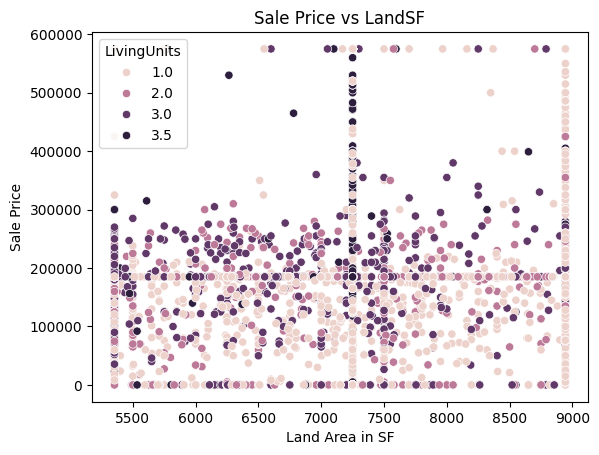

In [59]:
##Scatter plot for sales price vs Land SF value
sns.scatterplot(data=data, x= 'LandSF', y= 'SalePrice', hue='LivingUnits')
plt.title('Sale Price vs LandSF')
plt.xlabel('Land Area in SF')
plt.ylabel('Sale Price')
plt.show()

##### Observations
- From the plot we can see there is no significant co-relation between Land Area and Sale Price
- But there is signiicant co-releation between No. of living units and Sale Price (Properties with 3+ living units sells at a higher price)
- **Interesting Why these are not correlead??** - Let's findout in the next plots

#### Total Finished Area vs Total Finished Area - Scatter Plot

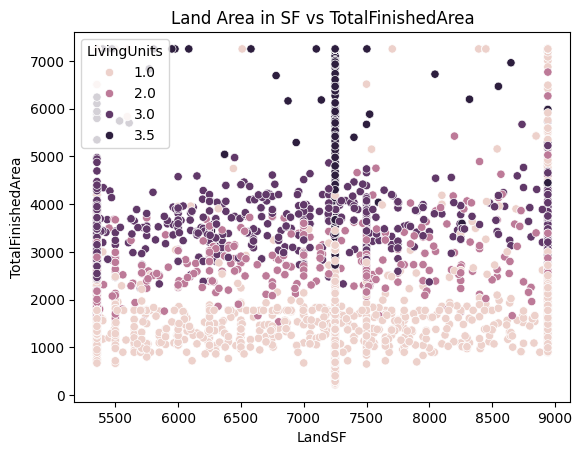

In [60]:
##Scatter plot for sales price vs Total Finished Area
sns.scatterplot(data=data, x= 'LandSF', y= 'TotalFinishedArea', hue='LivingUnits')
plt.title('Land Area in SF vs TotalFinishedArea')
plt.xlabel('LandSF')
plt.ylabel('TotalFinishedArea')
plt.show()

##### Observations
- There is no direct relationship between LandSF and TotalFinishedArea but properties with  higher fineshed area also contain higher Living Units

#### Sales price vs Total Finished Area - Scatter Plot

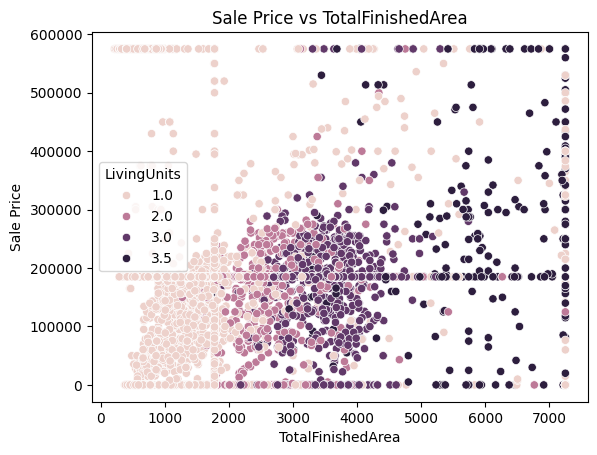

In [61]:
##Scatter plot for sales price vs Total Finished Area
sns.scatterplot(data=data, x= 'TotalFinishedArea', y= 'SalePrice', hue='LivingUnits')
plt.title('Sale Price vs TotalFinishedArea')
plt.xlabel('TotalFinishedArea')
plt.ylabel('Sale Price')
plt.show()

##### Observations
- From the plot we can see, Larger the area of Finished Area , greater the price
- Also, for the properties with less than 2000 sft Finished Area, almost all the properties have only **1 Living unit**
- No. of living units increased with increasing in TotalFinishedArea
- So it is evident from this plot that **TotalFinishedArea corealates better with Sale Price.**

#### Busiest streets in terms of sales - bar plot

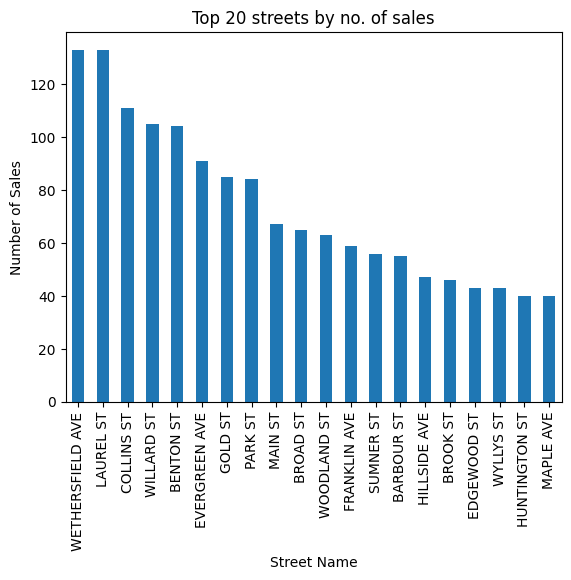

In [62]:
#Getting the busisest streets in terms of sales of prepories
top_streets = data['StreetNameAndWay'].value_counts().head(20)
top_streets.plot(kind='bar')
plt.title('Top 20 streets by no. of sales')
plt.xlabel('Street Name')
plt.ylabel('Number of Sales')

plt.show()

##### Observations
- Streets like WETHERSFIELD AVE, LAUREL ST, COLLINS ST, WILLARD ST are the most busiest streets in terms of property sales

#### **Price per Square Foot** in busiest streets(in terms of no. of sales)

In [63]:
#Calculating Price per Square Foot
data['PricePerSqFt'] = data['SalePrice']/data['TotalFinishedArea']

In [64]:
#Calculating the average price per square foot - Street wise
top_streets_column_names = top_streets.index
filtered_data = data[data['StreetNameAndWay'].isin(top_streets_column_names)]

price_per_sft_for_busiest_streets = (
    filtered_data.groupby('StreetNameAndWay')['PricePerSqFt'].mean().sort_values(ascending=False)
)

price_per_sft_for_busiest_streets

StreetNameAndWay
SUMNER ST          1,147.33
LAUREL ST          1,128.78
WILLARD ST           984.72
COLLINS ST           975.66
WYLLYS ST            878.61
BENTON ST            833.75
EVERGREEN AVE        782.46
HUNTINGTON ST        653.58
BROOK ST             427.18
BARBOUR ST           255.40
GOLD ST              233.16
BROAD ST             218.71
WETHERSFIELD AVE     183.51
FRANKLIN AVE         121.94
WOODLAND ST          116.09
HILLSIDE AVE          72.08
MAIN ST               70.91
MAPLE AVE             63.20
PARK ST               58.84
EDGEWOOD ST           26.55
Name: PricePerSqFt, dtype: float64

##### Observations on Price Per Square Foot for Busiest Streets

**Premium Streets**
- Streets like SUMNER ST(1,147.33) and LAUREL ST(1,128.78) show the highest price per square foot, indicating premium locations
**Low Valued Streets**
- Streets like EDGEWOOD ST(26.55) and PARK ST(58.84) show the highest price per square foot, indicating low valued but hot selling locations


#### Costliest Streets in the overall dataset

In [65]:

#Calculating Costliest Streets
top_ten_streets_price_sqft = (
    data.groupby('StreetNameAndWay')['PricePerSqFt'].mean().sort_values(ascending=False).head(10)
)

top_ten_streets_price_sqft


StreetNameAndWay
ASYLUM AVE    1,182.20
SUMNER ST     1,147.33
LAUREL ST     1,128.78
MARSHALL ST   1,084.23
FALES ST      1,024.45
WILLARD ST      984.72
COLLINS ST      975.66
UNKNOWN         951.99
NILES ST        930.08
WYLLYS ST       878.61
Name: PricePerSqFt, dtype: float64

##### Observations
- ASYLUM AVE(1,182.20), SUMNER ST(1,147.33),LAUREL ST(1,128.78),MARSHALL ST(1,084.23),FALES ST(1,024.45) are the most premium streets with price per sq feat geater than $1000 

### Time Series Analysis

In [66]:
#Extracting Year and Month from SaleDate
data['Year']=data['SaleDate'].dt.year
data['Month']= data['SaleDate'].dt.month_name()
data['MonthNumber']= data['SaleDate'].dt.month

#### Yearly Sales Volume

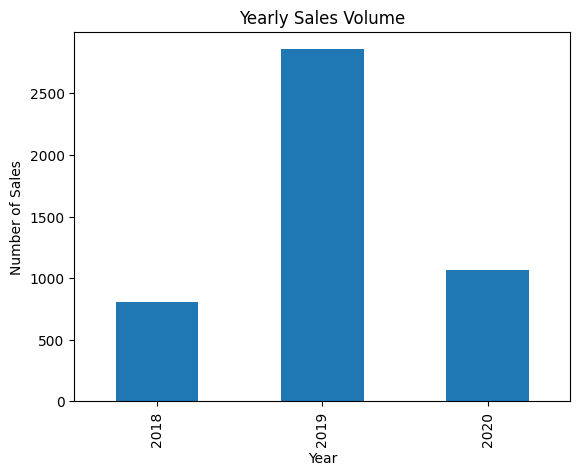

In [67]:
sales_per_year = data.groupby('Year')['SalePrice'].count()
sales_per_year.plot(kind='bar')
plt.title('Yearly Sales Volume')
plt.xlabel('Year')
plt.ylabel('Number of Sales')

plt.show()

##### Observations
- 2019 has the most number of sales(2500+)
- This might be because we do not have full year data for the years 2018 and 2020

#### Top Selling Months

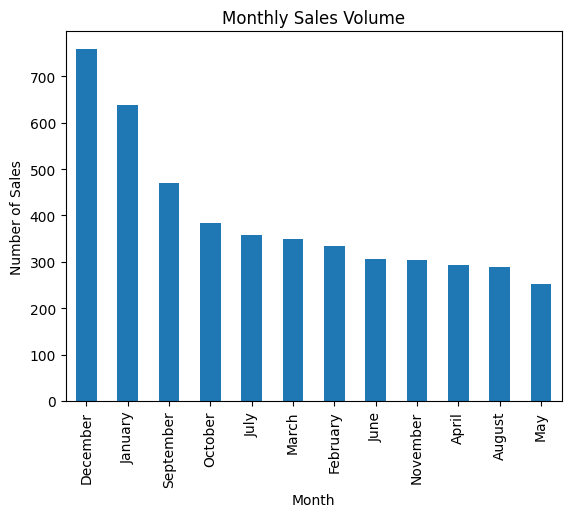

In [68]:
# Grouping by month to see seasonal variations
sales_per_month = data.groupby('Month')['SalePrice'].count().sort_values(ascending = False)
sales_per_month.plot(kind='bar')
plt.title('Monthly Sales Volume')
plt.xlabel('Month')
plt.ylabel('Number of Sales')

plt.show()

##### Observations
- From the plot we could see maximum activity in the year ending months and January.
- Mid year might be off-season for real estate sales

#### Trend over the time - sum & count of montly sales

In [69]:
data['YearMonth']= data['SaleDate'].dt.to_period('M').dt.strftime('%b%y')


In [70]:
#Grouping by YearMonth and finding aggregations
sales_trends = data.groupby('YearMonth').agg(
    SalesCount = ('SalePrice', 'count'),
    TotalSales = ('SalePrice', 'sum')
).reset_index()


#Sort by Time period

sales_trends['YearMonth'] = pd.to_datetime(sales_trends['YearMonth'], format='%b%y')
sales_trends=sales_trends.sort_values('YearMonth')



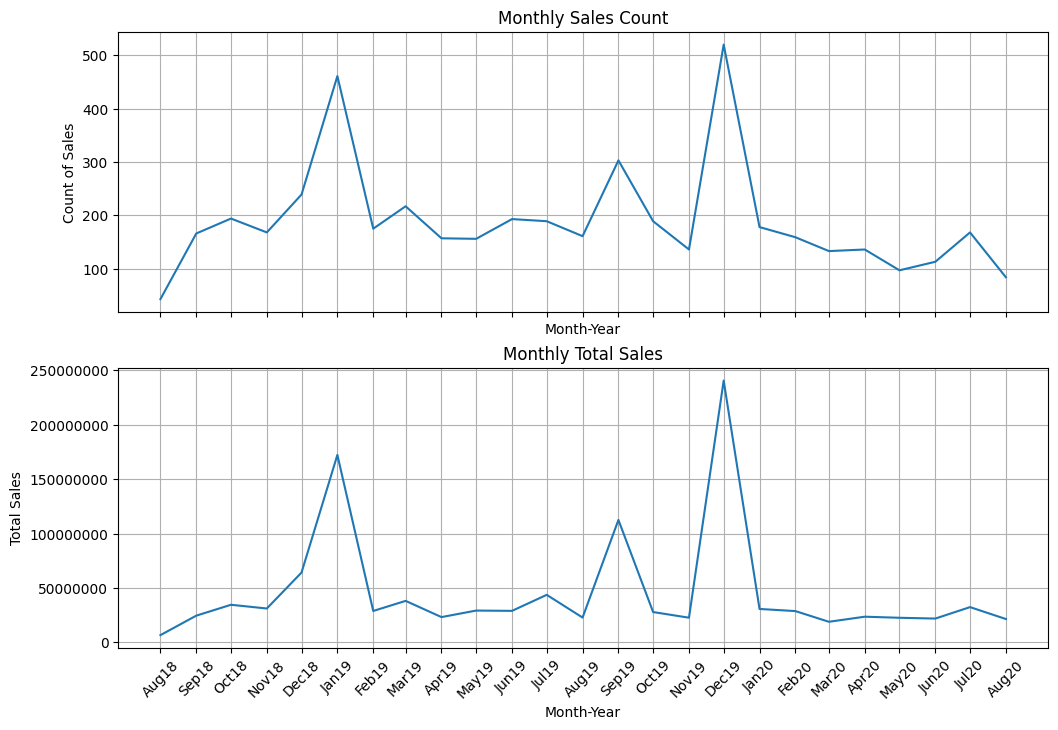

In [71]:
#Plotting
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8),sharex = True)
ax1.grid(True)
ax1.plot(sales_trends['YearMonth'], sales_trends['SalesCount'])
ax1.set_title('Monthly Sales Count')
ax1.set_ylabel('Count of Sales')
ax1.set_xlabel('Month-Year')


ax2.grid(True)
ax2.plot(sales_trends['YearMonth'], sales_trends['TotalSales'])
ax2.set_title('Monthly Total Sales')
ax2.set_ylabel('Total Sales')
ax2.set_xlabel('Month-Year')


ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))


ax2.set_xticks(sales_trends['YearMonth'])



ax2.set_xticklabels(sales_trends['YearMonth'].dt.strftime('%b%y'), rotation=45)
plt.show()


#### Observations
- From the plot we coud see there is seasonality in real estate sales
- Q1 and Q4 of every year witnesses the peak sales both interms of volumes and value

# Insights and Summary
## Key Findings
1. **Sales trends**:
     - 2019 saw the highest number of property sales with **Q1 andQ4** being the busiest periods each year
     - Properties with larger finished areas and more living units generally have higher prices

2. **Top Streets by Activity**:
    - Streets like **WETHERSFIELD AVE, LAUREL ST, COLLINS ST, WILLARD ST** had the **highest number of property sales.**
   

3. **Price Per Square Foot**:
    - **SUMNER ST** and **LAUREL ST** b had the **highest price per square foot** in high-activity streets.
    - Costilest overall streets include **ASYLUM AVE**(1,182.20) and **SUMNER ST**(1,147,33).
 


4. **Seasonal Trends**:
    - Sales volums are higher at **begininning and end of the year** - There is a clear seasionality

## Recommendations
1. **Focus on Q1 and Q4**: 
     - Increase marketing efforts in year and and begininning of the years as these months see highest activity
2. **Target High Value Locations**:
     -  Focus on streets like **SUMNER ST** and **LAUREL ST** as these are hotspots for premium properties
3. **Target Larger Properties**:
     - To attract premium prices, develop properties with larger finished areas and multiple living units
4. **Seasonal Adjustments**:
    - Be mindful of the off-season in mid-year and plan accordingly

## Future Scope of this Project
1. **Machine Learning Models for prediction and Classification**:
     - We can implement **Linear Regression** for price prediction
     - We can segment properties into different price segments using **K-Means Clustering**


